#    Simple Linear Regression(Salary_Data)

Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### EDA and Visualisation

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
data.describe

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [9]:
data.shape

(30, 2)

In [10]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

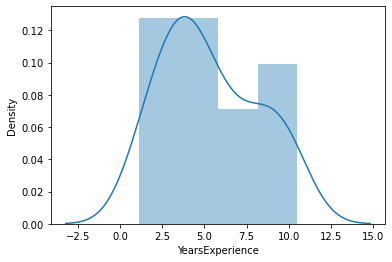

In [12]:
sns.distplot(data['YearsExperience'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

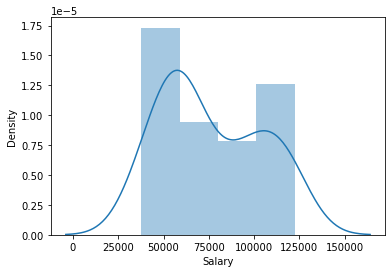

In [13]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

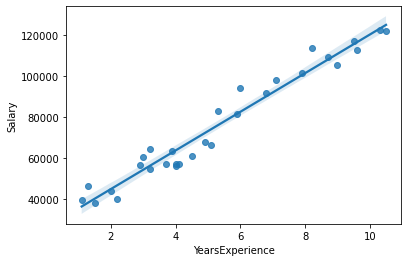

In [14]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

#### coorelation analysis

In [15]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Model Building

In [16]:
model=smf.ols("Salary~YearsExperience",data=data).fit()    

In [17]:
model

#### model testing 

In [18]:
model.params ##coefficient parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
model.tvalues,model.pvalues  #find p & t values

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [20]:
model.rsquared,model.rsquared_adj      #find r-squared values

(0.9569566641435086, 0.9554194021486339)

#### model predictions

In [21]:
#Manual prediction for 3 years experience
Salary=(25792.200199)+(9449.962321)*(3)
Salary

54142.087162

In [22]:
#Automatic Prediction for 3 and 5 years of experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [24]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [25]:
data_pred['Predicted']=model.predict(data_pred)
data_pred

,YearsExperience,Predicted
0,3,54142.087163
1,5,73042.011806
